Measured fraction alive [0.82055989 0.84988558 0.88056959 0.90946502 0.92427719 0.94031221
 0.95726103 0.9760479  0.9797515  0.98107983 0.98111469]
------Non paralyzable model-----
fraction alive predicted by non paralyzable model [0.87082402 0.88440904 0.89984428 0.91597256 0.92498641 0.93396004
 0.94324643 0.95286057 0.95689611 0.96333485 0.96816486]
the fitted del dead time is 12.246074422904817  us

-----paralyzable model-----
fraction alive predicted by the paralyzable model [0.87556434 0.88741297 0.90110445 0.91561872 0.92386134 0.93212327
 0.94075131 0.94976848 0.95358927 0.95975496 0.9643938 ]
the fitted del dead time is 14.321386984412026  us


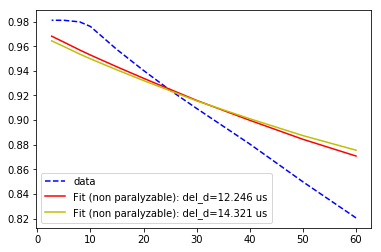

In [83]:
# Anni Xiong
# program for fitting to the dead time models using scipy curve fit

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Non paralyzable model dead time equations:
# 1 - measured_rate * dead time = measured rate / true rate = fraction alive

# we are fitting to the model:
# 1 - measured rate * (dead time + del_d) = fraction alive
# or
# measured rate(x) * del_d = 1- fraction alive - measured rate * veto
# in which we want to get del_d as the fitting parameter

# customized function to be used for fitting
def func (x, del_d):
    return x * del_d

# Data from measurements
veto_in_us = np.array([60, 50, 40, 30, 25, 20, 15, 10, 8 , 5, 2.7])
veto_in_s = veto_in_us * 1e-6
scaler_total_cr = np.array([2179, 2185, 2177, 2187, 2179, 2178, 2176, 2171, 2173, 2167, 2171])
mea_rate = np.array([1788, 1857, 1917, 1989, 2014, 2048, 2083, 2119, 2129, 2126, 2130])
frac_alive_trig = mea_rate / scaler_total_cr

y_non_para = 1- veto_in_s *mea_rate- frac_alive_trig
y_para = -mea_rate*veto_in_s - np.log(frac_alive_trig)

# returning the fitting parameters with the non-paralyzable model 
popt, pcov = curve_fit (func, mea_rate, y_non_para)
# returning the fitting parameters with the paralyzable model parameters
popt_p, pcov_p = curve_fit (func, mea_rate, y_para)

print ("Measured fraction alive", frac_alive_trig)
print ("------Non paralyzable model-----")
print ("fraction alive predicted by non paralyzable model", 1- veto_in_s* mea_rate - mea_rate* (1.22460744229e-05))
print ("the fitted del dead time is", popt[0]*10e+5," us")
print ("");
print ("-----paralyzable model-----")
print ("fraction alive predicted by the paralyzable model", np.exp(-mea_rate* (veto_in_s + 1.432139e-05)))
print ("the fitted del dead time is", popt_p[0]*10e+5," us")

# plotting
fig, ax = plt.subplots ()
ax.plot(veto_in_us, frac_alive_trig, 'b--', label = 'data')
ax.plot(veto_in_us, 1- veto_in_s* mea_rate - mea_rate* popt[0], 'r-', label='Fit (non paralyzable): del_d=%5.3f us' % (popt[0]*1000000))
ax.plot(veto_in_us, np.exp(-mea_rate* (veto_in_s + popt_p[0])), 'y-', label='Fit (non paralyzable): del_d=%5.3f us' % (popt_p[0]*1000000))
ax.legend()
plt.show ()
#plt.savefig('dead_time_fitting.png')

non para -0.0001895911600357267 0.40863284604093064
[0.82307615 0.85058794 0.87813341 0.90879397 0.92285375 0.93868985
 0.95504054 0.97192082 0.97797473 0.98380796 0.98944532]
para -0.0002386706533221389 0.5121991377861848
[0.80726399 0.83816227 0.8686525  0.90284679 0.91813356 0.93563836
 0.95370683 0.97235398 0.97889868 0.98458467 0.99041835]


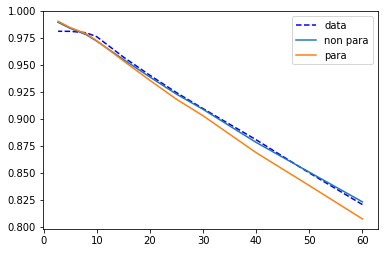

In [70]:
polyfit_non_para = np.polyfit (mea_rate, y_non_para,  1)
polyfit_para = np.polyfit (mea_rate, y_para, 1)

print ("non para",polyfit_non_para[0], polyfit_non_para[1])
print (1- veto* mea_rate - mea_rate* (-0.00018959116) - 0.408632846)
print ("para", polyfit_para[0], polyfit_para[1])
print (1- veto* mea_rate - mea_rate* (-0.00023867065) - 0.51219913)

fig,ax = plt.subplots()
ax.plot(veto_in_us, frac_alive_trig, 'b--', label = 'data')
ax.plot (veto_in_us, 1- veto* mea_rate - mea_rate* (-0.0001895911600357267) - 0.40863284604093064, label = "non para")
ax.plot (veto_in_us, 1- veto* mea_rate - mea_rate* (-0.0002386706533221389) - 0.5121991377861848, label="para")
plt.savefig ('polyfitfig.png')
ax.legend()

non paralyzable model
[0.07216011 0.05726442 0.04275041 0.03086498 0.02537281 0.01872779
 0.01149397 0.0027621  0.0032165  0.00829017 0.01313431]
the fitted del dead time is -189.5911599398848  us 0.40863284584750453

paralyzable model
[0.09048838 0.06980355 0.05050632 0.03522874 0.02839326 0.02058332
 0.01243417 0.00305361 0.00342432 0.00847144 0.01331491]
the fitted del dead time is -238.67065363274526  us 0.40863284584750453


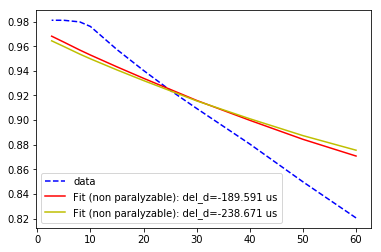

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#mea_rate, (1- frac_alive_trig - mea_rate*veto_in_us)
"""non-paralyzable model"""
def func (x, del_d, b):
    return x * del_d + b

veto_in_us = np.array([60, 50, 40, 30, 25, 20, 15, 10, 8 , 5, 2.7])
veto = veto_in_us * 1e-6
scaler_total_cr = np.array([2179, 2185, 2177, 2187, 2179, 2178, 2176, 2171, 2173, 2167, 2171])
mea_rate = np.array([1788, 1857, 1917, 1989, 2014, 2048, 2083, 2119, 2129, 2126, 2130])
frac_alive_trig = mea_rate / scaler_total_cr

y_non_para = 1- veto *mea_rate- frac_alive_trig
y_para = -mea_rate*veto - np.log(frac_alive_trig)

# returning the non-paralyzable model parameters
popt, pcov = curve_fit (func, mea_rate, y_non_para)
# returning the paralyzable model parameters
popt_p, pcov_p = curve_fit (func, mea_rate, y_para)

print ("non paralyzable model")
print (y_non_para)
print ("the fitted del dead time is", popt[0]*10e+5, " us", popt[1])
print ("");
print ("paralyzable model")
print (y_para)
print ("the fitted del dead time is", popt_p[0]*10e+5, " us", popt[1])

fig, ax = plt.subplots ()
ax.plot(veto_in_us, frac_alive_trig, 'b--', label = 'data')
ax.plot(veto_in_us, 1- veto* mea_rate - mea_rate* (1.22460744229e-05), 'r-', label='Fit (non paralyzable): del_d=%5.3f us' % (popt[0]*1000000))
ax.plot(veto_in_us, np.exp(-mea_rate* (veto+1.432139e-05)), 'y-', label='Fit (non paralyzable): del_d=%5.3f us' % (popt_p[0]*1000000))
#ax.set_ylim (0.7, 0.99)
ax.legend()
plt.show ()

#plt.savefig('dead_time_fitting.png')

In [48]:
xx = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])
y = 1 + xx -2*xx

def func (x, slope):
    return x * slope 

popt, pcov = curve_fit (func, xx, y)
print (popt[0])
polyfit = np.polyfit (xx, y, 1)
print (polyfit[0], polyfit[1])



-0.7272727272764945
-1.0 1.0000000000000004


In [3]:
for i in range (566):
    ii = i + 3433
    print ("[ -f /phys/groups/tev/scratch3/users/annix/result/run_%s_0/tdc_test0.root ] && echo \"00\" || echo \"%s does not exist !! \""%(ii,ii))
    


[ -f /phys/groups/tev/scratch3/users/annix/result/run_3433_0/tdc_test0.root ] && echo "00" || echo "3433 does not exist !! "
[ -f /phys/groups/tev/scratch3/users/annix/result/run_3434_0/tdc_test0.root ] && echo "00" || echo "3434 does not exist !! "
[ -f /phys/groups/tev/scratch3/users/annix/result/run_3435_0/tdc_test0.root ] && echo "00" || echo "3435 does not exist !! "
[ -f /phys/groups/tev/scratch3/users/annix/result/run_3436_0/tdc_test0.root ] && echo "00" || echo "3436 does not exist !! "
[ -f /phys/groups/tev/scratch3/users/annix/result/run_3437_0/tdc_test0.root ] && echo "00" || echo "3437 does not exist !! "
[ -f /phys/groups/tev/scratch3/users/annix/result/run_3438_0/tdc_test0.root ] && echo "00" || echo "3438 does not exist !! "
[ -f /phys/groups/tev/scratch3/users/annix/result/run_3439_0/tdc_test0.root ] && echo "00" || echo "3439 does not exist !! "
[ -f /phys/groups/tev/scratch3/users/annix/result/run_3440_0/tdc_test0.root ] && echo "00" || echo "3440 does not exist !! "


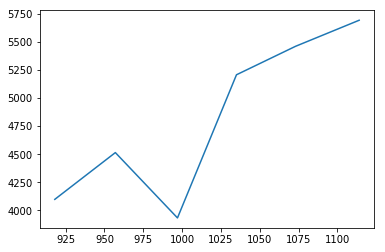

In [6]:
cen = np.array([1114,1073, 1035, 997,957, 918])
CR = np.array([5691, 5459, 5206, 3933, 4514, 4098])

fig,ax = plt.subplots()
ax.plot(cen, CR)
plt.show()